#Importing Libraries and uploading data


In [3]:
from google.colab import files
uploaded = files.upload()

Saving listings (1).csv to listings (1).csv


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#Analysis

##Exploring Dataset


In [5]:
Listing_Or = pd.read_csv("listings (1).csv")
Listing_Or.head(5)
#Discovering the data set head rows

id                                   name  host_id host_name  \
0   13913    Holiday London DB Room Let-on going    54730     Alina   
1   15400    Bright Chelsea  Apartment. Chelsea!    60302  Philippa   
2   17402  Superb 3-Bed/2 Bath & Wifi: Trendy W1    67564       Liz   
3  172811       Nice double bedroom in NW London   806983    Elinor   
4  173082    The Residential Suite Above Gallery   813141    Ingrid   

   neighbourhood_group           neighbourhood   latitude  longitude  \
0                  NaN               Islington  51.568610  -0.112700   
1                  NaN  Kensington and Chelsea  51.487800  -0.168130   
2                  NaN             Westminster  51.521950  -0.140940   
3                  NaN                  Camden  51.547100  -0.179810   
4                  NaN                 Hackney  51.538254  -0.044086   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     79               1                 40  2022-10-30   
1  Entire home/apt     75              10                 92  2022-10-24   
2  Entire home/apt    425               4                 54  2022-11-19   
3  Entire home/apt    229              21                  0         NaN   
4  Entire home/apt    132               2                199  2022-11-30   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.27                               2               361   
1               0.58                               1                29   
2               0.38                               7               241   
3                NaN                               1                 0   
4               1.44                               2               111   

   number_of_reviews_ltm  license  
0                     18      NaN  
1                      3      NaN  
2                     11      NaN  
3                      0      NaN  
4                      3      NaN

In [6]:
Listing = Listing_Or.drop (['license','neighbourhood_group'], axis=1)
#identifying numerical data and corresponding metrics
#Removing completely null columns
Listing.describe()


id       host_id      latitude     longitude         price  \
count  7.193800e+04  7.193800e+04  71938.000000  71938.000000  71938.000000   
mean   1.906421e+17  1.302250e+08     51.509796     -0.128060    179.044038   
std    3.089116e+17  1.448766e+08      0.048221      0.098929    459.367116   
min    1.391300e+04  2.594000e+03     51.295937     -0.497800      0.000000   
25%    1.901316e+07  1.911581e+07     51.483460     -0.189590     59.000000   
50%    3.666804e+07  6.253360e+07     51.513770     -0.125760    100.000000   
75%    5.940407e+17  2.073428e+08     51.539790     -0.068253    180.000000   
max    7.781518e+17  4.908020e+08     51.681142      0.288570  53588.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    71938.000000       71938.000000       54815.000000   
mean         5.838569          17.878896           0.926740   
std         24.248758          41.221431           1.298427   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.130000   
50%          2.000000           4.000000           0.470000   
75%          4.000000          16.000000           1.150000   
max       1125.000000        1171.000000          48.000000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    71938.000000      71938.000000           71938.000000  
mean                        12.690289        112.404612               5.315494  
std                         39.943321        135.767106              12.532506  
min                          1.000000          0.000000               0.000000  
25%                          1.000000          0.000000               0.000000  
50%                          1.000000         40.000000               0.000000  
75%                          4.000000        232.000000               6.000000  
max                        281.000000        365.000000             604.000000

In [7]:
Listing.shape

(71938, 16)

In [8]:
Listing.info()
#last_review and reviews_per_month seems to have the highest count of nulls, Last review date is not essential in this study so we will be eliminating it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71938 entries, 0 to 71937
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              71938 non-null  int64  
 1   name                            71914 non-null  object 
 2   host_id                         71938 non-null  int64  
 3   host_name                       71933 non-null  object 
 4   neighbourhood                   71938 non-null  object 
 5   latitude                        71938 non-null  float64
 6   longitude                       71938 non-null  float64
 7   room_type                       71938 non-null  object 
 8   price                           71938 non-null  int64  
 9   minimum_nights                  71938 non-null  int64  
 10  number_of_reviews               71938 non-null  int64  
 11  last_review                     54815 non-null  object 
 12  reviews_per_month               

##Handling Nulls - Numerical and Categorical Data Analysis

###Handling Null Data


In [9]:
#reviews_per_month column  contains null values, we need to calculate the % of nulls in order to decide which methdolgy is the best with eliminating null bias. 
missing_count = Listing['reviews_per_month'].isna().sum()
print(missing_count)
Total = Listing['id'].count()
Perc_of_NA = (missing_count/Total)*100
#Found out that % of null is 23%, there's different methods to impute data in this case, regression could be optimum here but we're not using the data to build a predective model, so for simplicity we're replacing it with 0. 
print(Perc_of_NA)

17123
23.802440990853235


In [10]:
#Assumption: We we will be replacing it with 0 as an arbitrary value. [reviews per month aren't used in my analysis but this method can be used to impute nulls]
Listing.fillna({'reviews_per_month':0}, inplace=True)
Missing = Listing['reviews_per_month'].isna().sum()
print(Missing)

0


In [11]:
Unique_hosts = Listing['host_id'].nunique()
calculated_host_listings_count_bigger_than_10 = Listing[Listing['calculated_host_listings_count']>10]
calculated_host_listings_count_bigger_than_10.head(10)
#identifying hosts with more than 10 listings to take samples and identify the quality of data based on the unit listing

id                                               name  host_id  \
26    47687       Cosy Double studio in Zone 2 Hammersmith (6)   216660   
30    49970                 Beautiful Small Studio Hammersmith   216660   
41    56229       Cosy Double studio in Zone 2 Hammersmith (1)   216660   
44    63948       Cosy Double studio in Zone 2 Hammersmith (4)   216660   
49    66772       Cosy Double studio in Zone 2 Hammersmith (3)   216660   
69    73884       Cosy Double studio in Zone 2 Hammersmith (2)   216660   
188  274918         Large 1 Bed apartment (A), wi-fi, sleeps 4   381894   
198  276888    Large 2Bedroom  Apartment (B), 4 Beds, sleeps 6   381894   
199  277580          2 Bedroom  Cottage (E) with garden London   381894   
331  390610  2 Bed/2 Bath (4-6ppl), Sky TV, AC, Entire Flat 11  1953756   

    host_name           neighbourhood  latitude  longitude        room_type  \
26      Boris  Hammersmith and Fulham  51.49340   -0.22929  Entire home/apt   
30      Boris  Hammersmith and Fulham  51.49462   -0.22923       Hotel room   
41      Boris  Hammersmith and Fulham  51.49547   -0.22942  Entire home/apt   
44      Boris  Hammersmith and Fulham  51.49547   -0.22864  Entire home/apt   
49      Boris  Hammersmith and Fulham  51.49370   -0.22914     Private room   
69      Boris  Hammersmith and Fulham  51.49349   -0.22766  Entire home/apt   
188      Eddy                  Merton  51.42229   -0.17800  Entire home/apt   
198      Eddy                  Merton  51.42328   -0.17789  Entire home/apt   
199      Eddy                Hounslow  51.49254   -0.30935  Entire home/apt   
331      Paul             Westminster  51.51476   -0.15813     Private room   

     price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
26      64               2                 93  2022-11-02               0.63   
30      64               1                121  2022-11-22               0.83   
41      60               5                 73  2022-11-22               0.49   
44      65               3                 65  2022-11-27               0.48   
49      60               3                 98  2022-11-10               0.68   
69      52               1                132  2022-11-26               0.92   
188    120               4                 23  2022-07-20               0.18   
198    150               3                 13  2022-11-15               0.10   
199    144               3                 15  2022-08-29               0.12   
331    453               2                 35  2022-12-04               0.27   

     calculated_host_listings_count  availability_365  number_of_reviews_ltm  
26                               11               196                     26  
30                               11               215                     28  
41                               11               263                     28  
44                               11               179                     29  
49                               11               311                     36  
69                               11               113                     54  
188                              20               314                      4  
198                              20               305                      4  
199                              20               204                      4  
331                              20                70                     24

In [12]:
Anna_rows = Listing[Listing['host_id'] == 1616720]
Anna_rows.head(20)
# taking random samples from people who has more than 10, hosts list different units, but it seems that even if they posted the same unit there could be a small change in latitude and longitude values [the same unit but different coordinated]. 
# Also, they could list the same unit but with different unit type [As a room in one listing, and as a home/apt in another] 

id                                               name  host_id  \
367      477286                             LOVELY 2 Bed Apartment  1616720   
1316    1212136                  SPACIOUS Apartment London SLEEP 9  1616720   
1398    1432552                MODERN Apartment 15min to Oxford St  1616720   
2128    2889261                MAGICAL URBAN RETREAT sleep up to 5  1616720   
2273    3086844                 CHARMING Apartment 15min to Centre  1616720   
2278    3087374  Luxurious Boutique Flat on Marylebone High Street  1616720   
4338    5976865                       STUNNING BRAND NEW APARTMENT  1616720   
17179  18301431         Modern Architect-Designed Duplex Apartment  1616720   
21330  21344641   CONTEMPORARY DESIGNER APARTMENT in London Centre  1616720   
26294  25717042                      Contemporary Boutique Retreat  1616720   
36542  37373222  Modern Victorian House NEW LISTING 15min to ce...  1616720   
50458  53233737          COZY CHIC HOUSE with GARDEN - New Listing  1616720   
50837  53544583  Stylish 3 bed Apartment in Queens Park New Lis...  1616720   

      host_name neighbourhood   latitude  longitude        room_type  price  \
367        Anna         Brent  51.535180  -0.203190  Entire home/apt    239   
1316       Anna         Brent  51.541930  -0.211180  Entire home/apt    175   
1398       Anna         Brent  51.534100  -0.202580  Entire home/apt    225   
2128       Anna        Camden  51.550200  -0.184450  Entire home/apt    384   
2273       Anna         Brent  51.533890  -0.204270  Entire home/apt    242   
2278       Anna   Westminster  51.519830  -0.150740  Entire home/apt    598   
4338       Anna         Brent  51.538180  -0.208500  Entire home/apt    275   
17179      Anna        Camden  51.548430  -0.182670  Entire home/apt    421   
21330      Anna   Westminster  51.519320  -0.150360  Entire home/apt    605   
26294      Anna         Brent  51.538930  -0.198700  Entire home/apt    995   
36542      Anna         Brent  51.534800  -0.208230  Entire home/apt    477   
50458      Anna         Brent  51.534700  -0.199770  Entire home/apt    332   
50837      Anna         Brent  51.535916  -0.197257  Entire home/apt    235   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
367                 4                 88  2022-11-06               0.80   
1316                3                 70  2022-11-30               0.62   
1398                4                112  2022-12-06               1.05   
2128                6                 85  2022-11-17               0.84   
2273                4                 72  2022-12-06               0.70   
2278                4                 91  2022-11-20               1.00   
4338                4                 81  2022-10-26               0.89   
17179               4                 62  2022-11-23               0.91   
21330               4                 21  2022-11-03               0.36   
26294               4                 33  2022-11-16               0.61   
36542               3                 16  2022-12-07               0.43   
50458               4                 12  2022-12-02               1.21   
50837               4                  2  2022-12-04               2.00   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
367                                13               216                     20  
1316                               13               133                      2  
1398                               13               224                     28  
2128                               13               199                      7  
2273                               13               227                     17  
2278                               13               186                     16  
4338                               13                90                     18  
17179                              13               199                     13  
21330              

###Categorical Data Exploration

In [13]:
Listing.neighbourhood.unique()
print(len(Listing.neighbourhood.unique()))
# checking the number of unique nieghbrohoods

33


In [14]:
Listing.room_type.unique()
print(len(Listing.room_type.unique()))
# checking the number of unique room_type

4


###Data Distrubution for different variables [Numerical Data]

####Minimum_Nights

<Axes: >

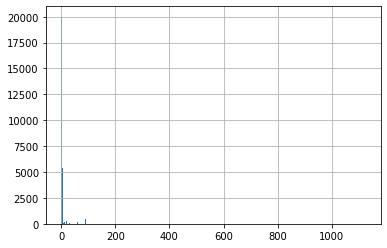

In [15]:
# after studying the data in terms of categorical and numerical data we want to identify the distrubution for each of the following: 
#taking the minimum and maximum values to see the distrubutions 
Listing['minimum_nights'].hist(bins=range(0, 1125, 1))
#Very right skewed distrubution

<Axes: >

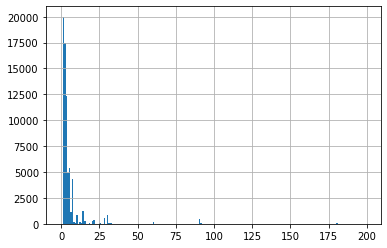

In [16]:
#taking a deeper look on the distrubution by minimzing the range to 200
Listing['minimum_nights'].hist(bins=range(0, 200, 1))

<Axes: >

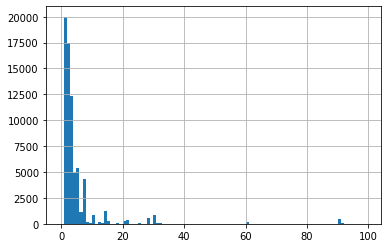

In [17]:
#the graph seems to be very right skewed, minimzing it to 100
Listing['minimum_nights'].hist(bins=range(0, 100, 1))


<Axes: >

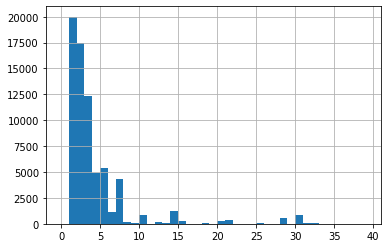

In [18]:
#we have most of the distrubtion ranging between 0 and 40
Listing['minimum_nights'].hist(bins=range(0, 40, 1))

<Axes: >

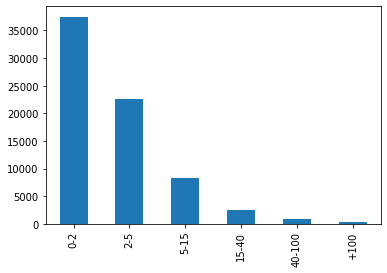

In [19]:

# taking groups of distribution ranging from 0-2, 2-5 , 5-15, 15-40, 40-100, +100
Listing['min_nights_category'] = pd.cut(Listing['minimum_nights'], bins=[0, 2, 5, 15, 40 , 100, 1225], labels=['0-2','2-5', '5-15', '15-40','40-100' ,'+100'])
Listing.head()
Count= Listing['min_nights_category'].value_counts()
Count.plot.bar()


####Price


<Axes: >

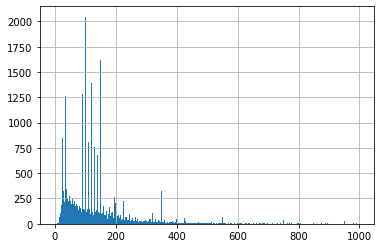

In [20]:
#Applying the same methdology for price and avalibality_365 variables
Listing['price'].hist(bins=range(0, 1000, 1))

In [21]:
#Applying the same methdology for price and avalibality_365
Listing['price_cat'] = pd.cut(Listing['price'], bins=[0,100, 200, 400, 600, 800 , 1000 , 5183], labels=['0-100', '100-200','200-400', '400-600', '600-800','800-1000' ,'+1000'])

<Axes: >

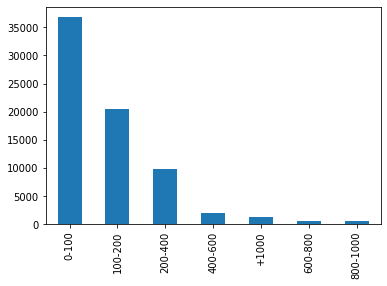

In [22]:
Count_P = Listing['price_cat'].value_counts()
Count_P.plot.bar()

####Availability_365


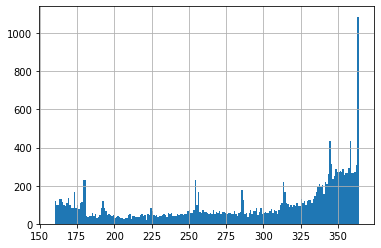

In [23]:
#we have the distrubtion ranging between 0 and 365
Listing['availability_365'].hist(bins=range(160,365, 1))
Listing['availability_365_category'] = pd.cut(Listing['availability_365'], bins=[-1,5, 10, 20, 40, 80 , 160 , 365], labels=['0-5', '5-10','10-20', '20-40', '40-80','80-160' ,'160-365'])

id                                   name  host_id host_name  \
0   13913    Holiday London DB Room Let-on going    54730     Alina   
1   15400    Bright Chelsea  Apartment. Chelsea!    60302  Philippa   
2   17402  Superb 3-Bed/2 Bath & Wifi: Trendy W1    67564       Liz   
3  172811       Nice double bedroom in NW London   806983    Elinor   
4  173082    The Residential Suite Above Gallery   813141    Ingrid   

            neighbourhood   latitude  longitude        room_type  price  \
0               Islington  51.568610  -0.112700     Private room     79   
1  Kensington and Chelsea  51.487800  -0.168130  Entire home/apt     75   
2             Westminster  51.521950  -0.140940  Entire home/apt    425   
3                  Camden  51.547100  -0.179810  Entire home/apt    229   
4                 Hackney  51.538254  -0.044086  Entire home/apt    132   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               1                 40  2022-10-30               0.27   
1              10                 92  2022-10-24               0.58   
2               4                 54  2022-11-19               0.38   
3              21                  0         NaN               0.00   
4               2                199  2022-11-30               1.44   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               361                     18   
1                               1                29                      3   
2                               7               241                     11   
3                               1                 0                      0   
4                               2               111                      3   

  min_nights_category price_cat availability_365_category  
0                 0-2     0-100                   160-365  
1                5-15     0-100                     20-40  
2                 2-5   400-600                   160-365  
3               15-40   200-400                       0-5  
4                 0-2   100-200                    80-160

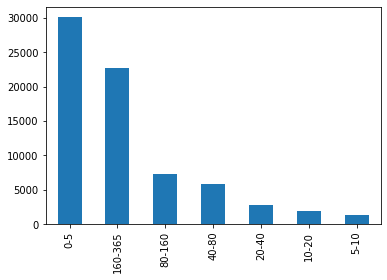

In [24]:
Count_A = Listing['availability_365_category'].value_counts()
Count_A.plot.bar()
# We can't take this as a clear prespective of occupation as users could block their listing 
Listing.head()

##Grouping Table into [Hosts - Neighbourhoods]

In [25]:
#this step would be very insightful if we have more charctrestics for Hosts/Neighbourhoods
#grouping by host_id and aggregating the number of reviews
Hosts = Listing.groupby(['host_id', 'host_name','calculated_host_listings_count']).agg({'number_of_reviews': 'sum'})
Hosts_final=Hosts.reset_index()
#resseting index to change the pivot into normal dataframe
Hosts_final['avg_reviews_per_listing']=Hosts_final['number_of_reviews']/Hosts_final['calculated_host_listings_count']
Hosts_final['Calculated_host_Listing_count_cat'] = pd.cut(Hosts_final['calculated_host_listings_count'], bins=[0,1, 5, 7, 10 , 281 ], labels=['1', '2-5','5-7', '7-10', '+10'])
Hosts_final.head()

host_id   host_name  calculated_host_listings_count  number_of_reviews  \
0     2594      Thomas                               1                  0   
1     4775   Sebastian                               7                815   
2     4879     Zuleyka                               1                  2   
3     5653  Atilla Ata                               1                 69   
4     6774        Roly                               6                151   

   avg_reviews_per_listing Calculated_host_Listing_count_cat  
0                 0.000000                                 1  
1               116.428571                               5-7  
2                 2.000000                                 1  
3                69.000000                                 1  
4                25.166667                               5-7

In [26]:
#grouping by host_id and aggregating the number of reviews
neighbourhood = Listing.groupby(['neighbourhood']).agg({'number_of_reviews': 'sum'})
neighbourhood_final=neighbourhood.reset_index()
neighbourhood_final.shape

(33, 2)

#Exporting CSVs of the three tables to include them in the Power BI report


In [28]:
#Finally Dropping the unwanted columns from Listing dataframe
Listing_final= Listing.drop (['last_review','reviews_per_month','number_of_reviews_ltm'], axis=1)
Listing_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71938 entries, 0 to 71937
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              71938 non-null  int64   
 1   name                            71914 non-null  object  
 2   host_id                         71938 non-null  int64   
 3   host_name                       71933 non-null  object  
 4   neighbourhood                   71938 non-null  object  
 5   latitude                        71938 non-null  float64 
 6   longitude                       71938 non-null  float64 
 7   room_type                       71938 non-null  object  
 8   price                           71938 non-null  int64   
 9   minimum_nights                  71938 non-null  int64   
 10  number_of_reviews               71938 non-null  int64   
 11  calculated_host_listings_count  71938 non-null  int64   
 12  availability_365  

In [126]:
Listing_final.to_csv('Listing_final.csv', index=False)
files.download('Listing_final.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [127]:
Hosts_final.to_csv('Hosts_final.csv', index=False)
files.download('Hosts_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [129]:
neighbourhood_final.to_csv('neighbourhood_final.csv', index=False)
files.download('neighbourhood_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>